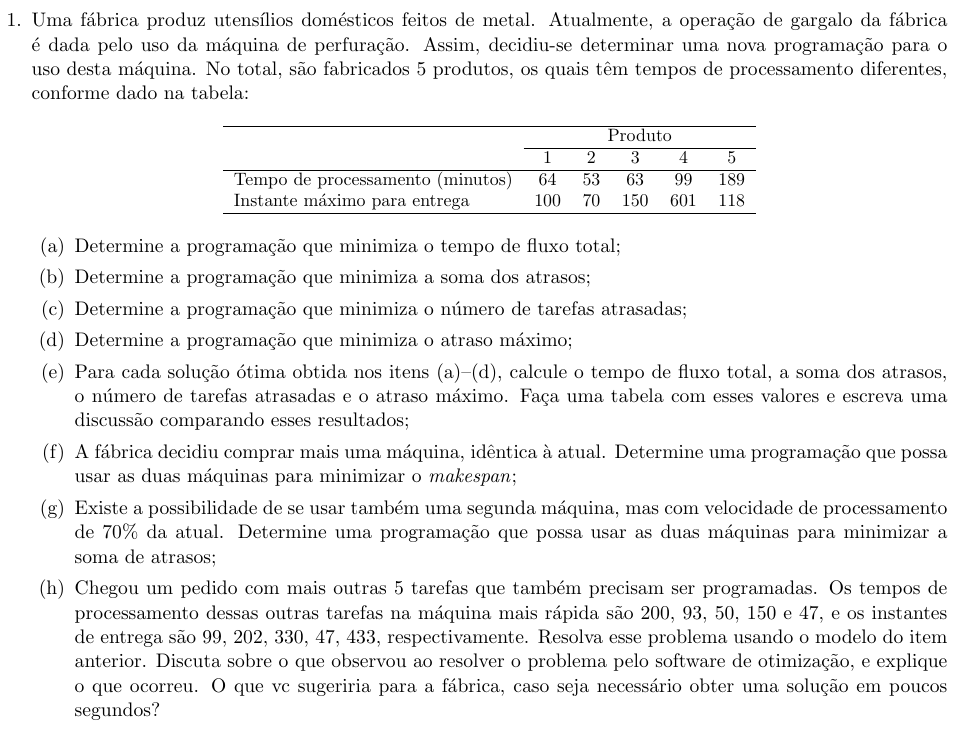

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/1.png')

In [7]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [8]:
# Dados
Tarefas = [i for i in range(6)]
proc_tempo = {0: 0, 1: 64, 2: 53, 3: 63, 4: 99, 5: 189}
entrega = {0: 0, 1: 100, 2: 70, 3: 150, 4: 601, 5: 118}
M = 10000

## a) Objetivo de minimizar o tempo de fluxo total

In [9]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.T = Set(initialize=Tarefas)
T = model.T

# Parâmetros
model.p = Param(T, initialize=proc_tempo, within=NonNegativeReals)
model.d = Param(T, initialize=entrega, within=NonNegativeReals)
p, d = model.p, model.d

# Variáveis de decisão
model.x = Var(T * T, within=Binary)  # Ordem de produção
model.C = Var(T, within=NonNegativeReals)  # Instante de conclusão
x, C = model.x, model.C

# Função objetivo
model.obj = Objective(sense=minimize,
                      expr = sum(C[i] for i in T))
    
# Restrições
# Um sucessor por tarefa
model.r_sucessor = ConstraintList()
for i in T:
    model.r_sucessor.add(expr = sum(x[i, j] for j in T if j != i) == 1)
# Um antecessor por tarefa
model.r_antecessor = ConstraintList()
for j in T:
    model.r_antecessor.add(expr = sum(x[i, j] for i in T if i != j) == 1)
# Tempo de término
model.r_termino = ConstraintList()
for i in T:
    for j in T:
        if j != i and j > 0:
            model.r_termino.add(expr = C[j] >= C[i] + p[j] * x[i, j] + M * (x[i, j] - 1))

# model.pprint()

In [10]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee=False)

In [11]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    print('Item a) Objetivo de minimizar o tempo de fluxo total \n')
    print('Tempo de fluxo total: {:.0f} minutos.'.format(sum(value(C[i]) for i in T)))
    print()
    for i in T:
        if i > 0:
            print('Atraso da tarefa {}: {}'.format(i, value(C[i] - d[i])))
            print('Conclusão da tarefa {}: {}'.format(i, value(C[i])))
            print('Entrega da tarefa {}: {}'.format(i, value(d[i])))
            print()
else:
    print(resultado.solver.termination_condition)

Item a) Objetivo de minimizar o tempo de fluxo total 

Tempo de fluxo total: 1096 minutos.

Atraso da tarefa 1: 80.0
Conclusão da tarefa 1: 180.0
Entrega da tarefa 1: 100

Atraso da tarefa 2: -17.0
Conclusão da tarefa 2: 53.0
Entrega da tarefa 2: 70

Atraso da tarefa 3: -34.0
Conclusão da tarefa 3: 116.0
Entrega da tarefa 3: 150

Atraso da tarefa 4: -322.0
Conclusão da tarefa 4: 279.0
Entrega da tarefa 4: 601

Atraso da tarefa 5: 350.0
Conclusão da tarefa 5: 468.0
Entrega da tarefa 5: 118

